In [8]:
import numpy as np
# load model with joblib
import joblib
loaded_svm_model = joblib.load('models/model-7-over.pkl')

# load test features and test labels
test_features = np.load('models/test_features-3-over.npy')
test_labels = np.load('models/test_labels-3-over.npy')

# make predictions
print("Making predictions...")
predictions = loaded_svm_model.predict(test_features)

# classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions))

Making predictions...
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       581
           1       0.86      0.75      0.80       695
           2       0.85      1.00      0.92       347
           3       0.85      1.00      0.92       347
           4       0.89      0.99      0.94       347
           5       0.96      1.00      0.98       347

    accuracy                           0.87      2664
   macro avg       0.87      0.91      0.89      2664
weighted avg       0.87      0.87      0.87      2664



Plots to see if the model is overfitting

Plotting learning curve...20:59:36
[learning_curve] Training set sizes: [  166  4274  8383 12492 16601]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 28.3min finished


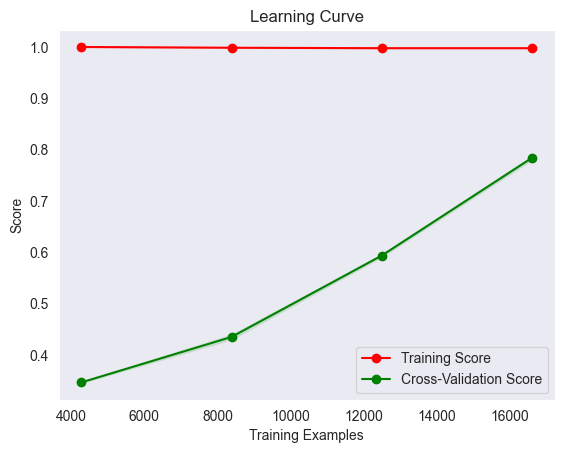

In [13]:
from datetime import datetime
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=75, gamma=0.01)
# learning curves
training_f = np.load('models/training_features-3-over.npy')
training_l = np.load('models/training_labels-3-over.npy')
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
print("Plotting learning curve..." + datetime.now().strftime("%H:%M:%S"))
train_sizes, train_scores, test_scores = learning_curve(svm_model, training_f, training_l, cv=5, scoring='accuracy', n_jobs=4, train_sizes=np.linspace(0.01, 1.0, 5), verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(test_scores, axis=1)
val_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()



In [14]:
print(train_sizes)
print(train_scores)
print(test_scores)

[  166  4274  8383 12492 16601]
[[       nan        nan        nan        nan        nan]
 [1.         1.         1.         1.         0.99976603]
 [0.99832995 0.99832995 0.99809138 0.99868782 0.99868782]
 [0.99767851 0.99759846 0.99695805 0.99791867 0.99775857]
 [0.99759051 0.99765074 0.99710861 0.99789169 0.99765074]]
[[       nan        nan        nan        nan        nan]
 [0.34738617 0.34473621 0.34554217 0.34674699 0.34626506]
 [0.43049868 0.43820766 0.43566265 0.4286747  0.44072289]
 [0.59479643 0.59551915 0.59180723 0.58987952 0.59542169]
 [0.78149843 0.780053   0.78506024 0.78289157 0.79036145]]


In [21]:
training_features = np.load('models/training_features-3.npy')
training_labels = np.load('models/training_labels-3.npy')
training_class_distribution = np.bincount(training_labels)

class_weights = dict(
    zip(
        range(len(training_class_distribution)),
        max(training_class_distribution) / training_class_distribution
    )
)

new_svm_model = SVC(kernel='poly', C=99, gamma='auto', class_weight=class_weights)
print("Training model..." + datetime.now().strftime("%H:%M:%S"))
new_svm_model.fit(training_features, training_labels)
print("Saving model..." + datetime.now().strftime("%H:%M:%S"))

# load test features and test labels
test_features = np.load('models/test_features-3.npy')
test_labels = np.load('models/test_labels-3.npy')

# make predictions
print("Making predictions...")
predictions = new_svm_model.predict(test_features)
print(classification_report(test_labels, predictions))

Training model...00:17:41
Saving model...00:21:01
Making predictions...
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       581
           1       0.77      0.58      0.66       695
           2       0.28      0.52      0.37       159
           3       0.43      0.49      0.46       275
           4       0.45      0.58      0.50       224
           5       0.26      0.64      0.37        66

    accuracy                           0.54      2000
   macro avg       0.48      0.55      0.49      2000
weighted avg       0.61      0.54      0.56      2000

